# Supervised Machine Learning Solution

In [33]:
"""
Importing all the basic libraries
"""

import os 
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from math import sqrt


In [19]:
"""
Importing all the sklearn models 
"""

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
from imblearn.ensemble import BalancedBaggingClassifier

In [8]:
warnings.filterwarnings("ignore")

In [9]:
"""
Reading the CSV file 
"""

data = pd.read_csv('new_physics_signal.csv')

In [10]:
"""
Printing the first 5 rows of the table
"""

data.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Class
0,78.482022,52.871985,-64.917465,-78.448475,-57.987246,-92.520585,27.806597,46.774201,-57.512910,22.899098,-38.790567,-83.959697,11.666977,846.710033,0
1,78.379086,55.058180,-68.153619,-82.693368,-59.561586,-93.335494,19.354007,47.128549,-60.470478,23.100267,-36.209469,-84.888323,11.836796,25.025335,0
2,79.609922,55.395154,-61.506139,-99.031856,-56.643424,-91.474574,32.361097,48.480810,-63.011139,20.523559,-38.380731,-85.190411,11.483291,2127.582986,0
3,80.592326,55.085738,-73.077999,-91.084996,-60.244160,-92.874068,25.292852,46.640591,-66.546879,25.600912,-39.059436,-84.421174,12.058619,700.637724,0
4,75.686606,56.323331,-69.943208,-75.363929,-57.215389,-92.485721,32.606410,46.729047,-56.972408,21.156952,-33.125372,-83.400313,12.788145,401.390816,0


### Data Preprocessing

In [11]:
"""
Checking the total number of rows those are having null values at each column
"""

data.isnull().sum()

p1       5
p2       5
p3       5
p4       5
p5       5
p6       5
p7       5
p8       5
p9       5
p10      5
p11      5
p12      5
p13      5
p14      5
Class    0
dtype: int64

### Taking care of missing data

In [12]:
"""
removing the values containing null, we can not replace as replacing would alter the event (the particle event), 
and as the number of datapoints are sufficient, we do not need to replace with mean and dropping is fine.
"""

data = data.dropna()
data.isnull().sum()

p1       0
p2       0
p3       0
p4       0
p5       0
p6       0
p7       0
p8       0
p9       0
p10      0
p11      0
p12      0
p13      0
p14      0
Class    0
dtype: int64

In [13]:
data['Class'].value_counts()

0    284245
1       492
Name: Class, dtype: int64

In [14]:
"""
As we can see that there are 492 datapoints with class value 1 and other 284245 is 0, which is unbalanced
and makes the model a bit overfitted and biased for class 0

Balancing the unbalanced data by randomly sampling the class with more datapoints. We took 600 random sampled 
datapoints from class 0 and keeping all the 423 number of datapoints for class 1. So that it is kept balanced. 
(however, I did't use the same technique for the previous notebook, in order to see the model performance)

This step is to deal with the bias-variance trade-off.
"""

shuffled = data.sample(frac=1, random_state=4)
data_zero = shuffled.loc[shuffled['Class'] == 0].sample(n=600, random_state = 123)
data_one = shuffled.loc[shuffled['Class'] == 1]

data_sampled_concated = pd.concat([data_zero, data_one]).sample(frac=1, random_state=4)
data_sampled_concated = data_sampled_concated.reset_index(drop=True)
data = data_sampled_concated

In [15]:
"""
x = Taking all the rows and columns (not the last)
y = Taking all the rows but just the last column
"""

data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

### Scaling and splitting the dataset into the training set and test set

In [20]:
"""
Standardizing the data between the value of -1 to + 1
"""

scaler = StandardScaler()

In [21]:
data_x_scaled = scaler.fit_transform(data_x)

In [22]:
"""
Converting pandas dataframe into numpy arrays
"""

X = np.array(data_x_scaled)
y = np.array(data_y)

# K-Means clustering

In [34]:
data.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Class
0,77.672184,54.008986,-69.023635,-79.256132,-59.731660,-93.365322,18.464684,47.107751,-58.156024,23.346332,-36.426056,-85.068770,11.787810,21.054763,0
1,80.451955,54.114047,-66.338322,-83.180004,-57.694637,-90.866809,24.025645,46.903878,-54.648712,25.148008,-33.886783,-81.313982,13.176248,14.232091,1
2,111.444343,54.509924,-80.350575,-72.524855,-60.111024,-88.197799,22.011122,47.767354,-53.192578,20.164871,-40.627603,-91.328600,10.651295,222.099920,1
3,53.092153,55.959604,-66.679893,-66.440330,-61.509749,-84.735927,23.239096,46.039832,-53.305913,20.383395,-42.253633,-110.290068,8.580786,73.678823,1
4,83.882752,53.809631,-69.439805,-81.765283,-58.982291,-93.239657,19.576255,47.221861,-53.721888,21.926072,-37.864042,-84.847947,11.699648,506.862629,0


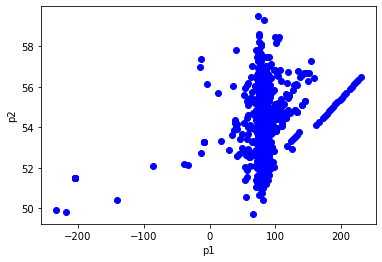

In [36]:
X = data[["p1", "p2"]]
plt.scatter(X["p1"], X["p2"], c="blue")
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

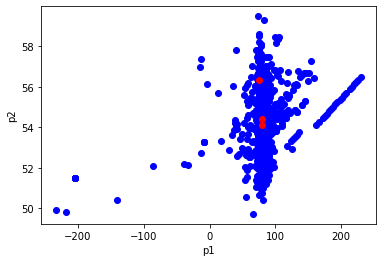

In [37]:
# step 1 and 2

# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["p1"], X["p2"], c="blue")
plt.scatter(Centroids["p1"], Centroids["p2"], c="red")
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [38]:
Centroids

,p1,p2
375,79.709873,54.139036
228,79.262160,54.398445
113,75.596640,56.353858


In [39]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["p1"]-row_d["p1"])**2
            d2 = (row_c["p2"]-row_d["p2"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["p2", "p1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['p2'] - Centroids['p2']).sum() + (Centroids_new['p1'] - Centroids['p1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["p2","p1"]]

-23.559677778037205
-40.69724348623388
-39.62115845845658
-10.09419456501611
-56.617751723388935
-24.8500905595628
1.391869652426216
1.4379205290206514
0.7786562638469618
0.0


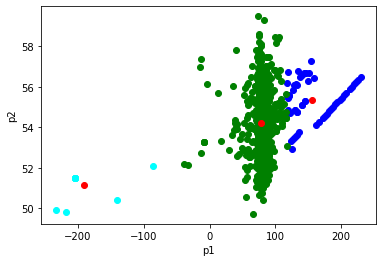

In [40]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["p1"],data["p2"],c=color[k])
plt.scatter(Centroids["p1"],Centroids["p2"],c='red')
plt.xlabel('p1')
plt.ylabel('p2')
plt.show()